# Homework Week 03
Nicola Zomer <br>
01 November, 2022

For the full derivation of the equations (or the solutions of the analytical points) see the attached pdf.

## Assignment
Consider the Lotka-Volterra equations:
$$
\begin{align*}
    \frac{dx}{dt} &= ax - pxy \\ 
    \frac{dy}{dt} &= -cy + pxy 
\end{align*}
$$
Tasks:
- Find the stationary solutions.
- Do the stability analysis of the stationary solutions. Is there any stable solution?
- (optional) Simulate the above Eqs. with different parameters. Is there a range of parameters where do you observe sustained oscillations? 

## Solution
The first 2 points are solved in the attached pdf. In particular, from point 1 we have that the stationary solutions are $(x_0^*, y_0^*)=(0, 0)$ and $(x_1^*, y_1^*)=(\frac{c}{p}, \frac{a}{p})$. In this notebook I only simulate the Lotka-Volterra equations using different values of the parameters. 

Recall that:
- $x$ is the number of prey
- $y$ is the number of predator
- $a$ is the growth rate of the prey's population
- $c$ is the death rate of the predator's population (it could also include emigration)
- $p$ controls the intensity of the mutual interaction between the two species (so, the predation process)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

# parameters of the model
a = 2
c = 1.1
p = 0.04

# stationary solution 
print('Stationary solutions:')
print('(x0, y0)=(0, 0)')
print('(x1, y1)=(%.2f, %.2f)' %(c/p, a/p))

Stationary solutions:
(x0, y0)=(0, 0)
(x1, y1)=(27.50, 50.00)


In [44]:
# initialization
x_0 = 100
y_0 = 15

# function computing the derivative
def derivative(z, time):
    '''
    z = (x, y)
    '''
    xdot = a*z[0]-p*z[0]*z[1]
    ydot = -c*z[1]+p*z[0]*z[1]
    
    return [xdot, ydot]


# define the interval
time_vec = np.linspace(0, 20, 1000)

# full solution: call the odeint() method
y = odeint(derivative, y0=[x_0, y_0], t=time_vec)


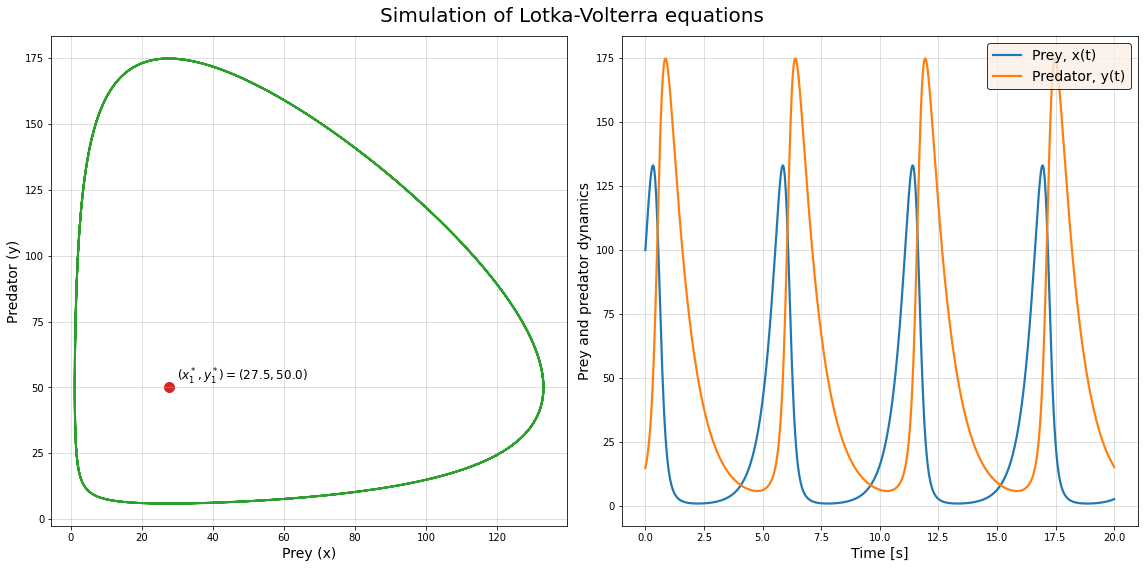

In [122]:
# plot the results
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Simulation of Lotka-Volterra equations', fontsize=20)

ax0.plot(y[:, 0], y[:, 1], linewidth=2, color='C2')

x1_star = c/p
y1_star = a/p
ax0.scatter(x1_star, y1_star, color='C3', s=100)
ax0.annotate('$(x_1^*, y_1^*)=(%.1f, %.1f)$' %(x1_star, y1_star), xy=(x1_star+2.5, y1_star+2.5), fontsize=12)
ax0.set_xlabel('Prey (x)', fontsize=14)
ax0.set_ylabel('Predator (y)', fontsize=14)
ax0.grid(alpha=0.5)
#ax0.set_ylim([0, 20.5])

ax1.plot(time_vec, y[:, 0], linewidth=2.2, label='Prey, x(t)', color='C0')
ax1.plot(time_vec, y[:, 1], linewidth=2.2, label='Predator, y(t)', color='C1')
ax1.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Prey and predator dynamics', fontsize=14)
ax1.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='upper right')
ax1.grid(alpha=0.5)
#ax1.set_ylim([0, 20.5])

plt.tight_layout()
plt.show()

### Varying the initial size of the predator's population

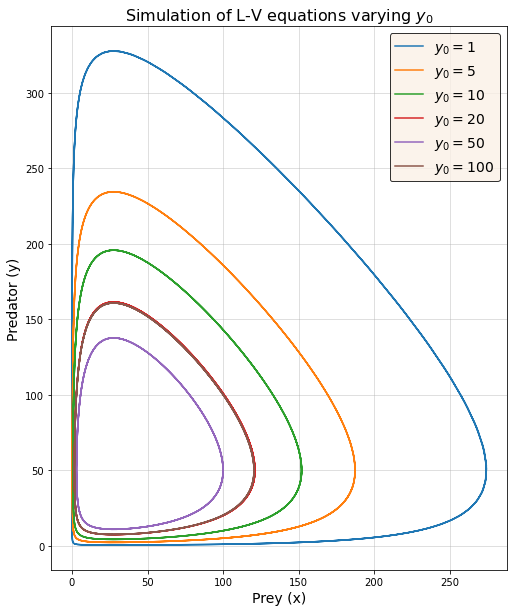

In [107]:
x0 = 100
y0_vec = [1, 5, 10, 20, 50, 100]

fig, ax = plt.subplots(figsize=(10, 10))

for i, y0_i in enumerate(y0_vec):
    y_i = odeint(derivative, y0=[x0, y0_i], t=time_vec)
    ax.plot(y_i[:, 0], y_i[:, 1], linewidth=1.5, label='$y_0=$%i' %y0_i)
    
ax.set_title('Simulation of L-V equations varying $y_0$', fontsize=16)
ax.set_xlabel('Prey (x)', fontsize=14)
ax.set_ylabel('Predator (y)', fontsize=14)
ax.grid(alpha=0.5)
ax.set_aspect('equal', 'box')
ax.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='upper right')

plt.show()